# <center> World Happiness Analysis: Exploring Relationships </center>

## Table of Contents:
01. Import Libraties & Data
02. Correlation Matrix
03. Scatterplot
04. Pair Plots
05. Categorical Plots
06. Questions & Answers
07. Hypothesis
08. Exporting Data


## 01. Import libraties & data

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 

In [6]:
path = r'C:\Users\thang\Desktop\Data Analytics\Data Analytics Immersion\Final Project\World Happiness Analysis\2. Data'

In [7]:
combined_data = pd.read_pickle(os.path.join(path, 'Edited', 'World_Happiness_Data.pkl'))

In [8]:
combined_data.shape

(781, 9)

In [9]:
combined_data.head()

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2015


## 02. Correlation Matrix

In [10]:
# creating subset excluding categorical variables
sub = combined_data[['Happiness Score', 'GDP', 'Life Expectancy', 'Freedom', 'Generosity','Corruption']]

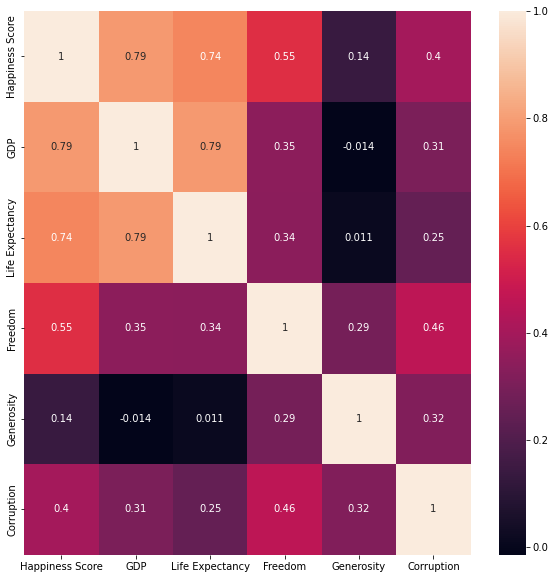

In [11]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The coefficients in the plot represent the strength of the relationship between two variables. The highest correlation values are 0.79 between GDP and Happiness Score, and 0.74 between Life Expectancy and Happiness Score. These correlations are stongly positive where higher GDP and Life Expectancy scores lead to higher Happiness Score. Meanwhile, GDP and Generosity are the only ones with a negative correlation where higher GDP score leads to lower Generostiy score. However, this correlation is very weak. 

## 03. Scatterplot 

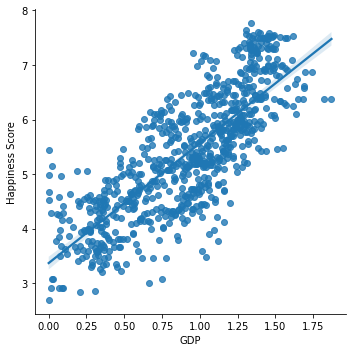

In [12]:
# scatterplot for Happiness Score & GDP
scatter1 = sns.lmplot(x='GDP', y ='Happiness Score', data = combined_data)

The plot shows GDP and Happiness Score have positive correlation. Happiness Score scatters further away from the trendline when GDP score is below 1.25.

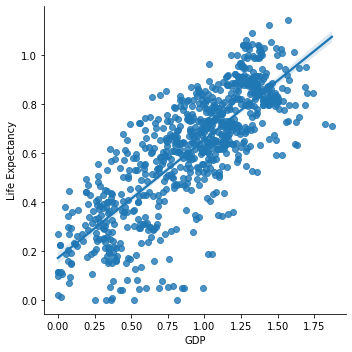

In [13]:
# scatterplot for GDP & Life Expectancy
scatter2 = sns.lmplot(x='GDP', y ='Life Expectancy', data = combined_data)

The plot shows life expectancy and GDP have positive correlation. Life Expectancy score decreases drastically when GDP score is lower than 1.

## 04. Pair Plots 

I will be going over a subset containing the most recent data from 2019 since there are duplicate country names with different years and pairplot does not show duplicates. I will be going over the previous years later part of the project.

In [14]:
# Create a subset for 2019 data
sub2 = combined_data[combined_data['Year'] == 2019]

In [15]:
# exlcude categorical columns
sub2 = sub2[['Happiness Score','GDP','Life Expectancy','Freedom','Generosity','Corruption']]

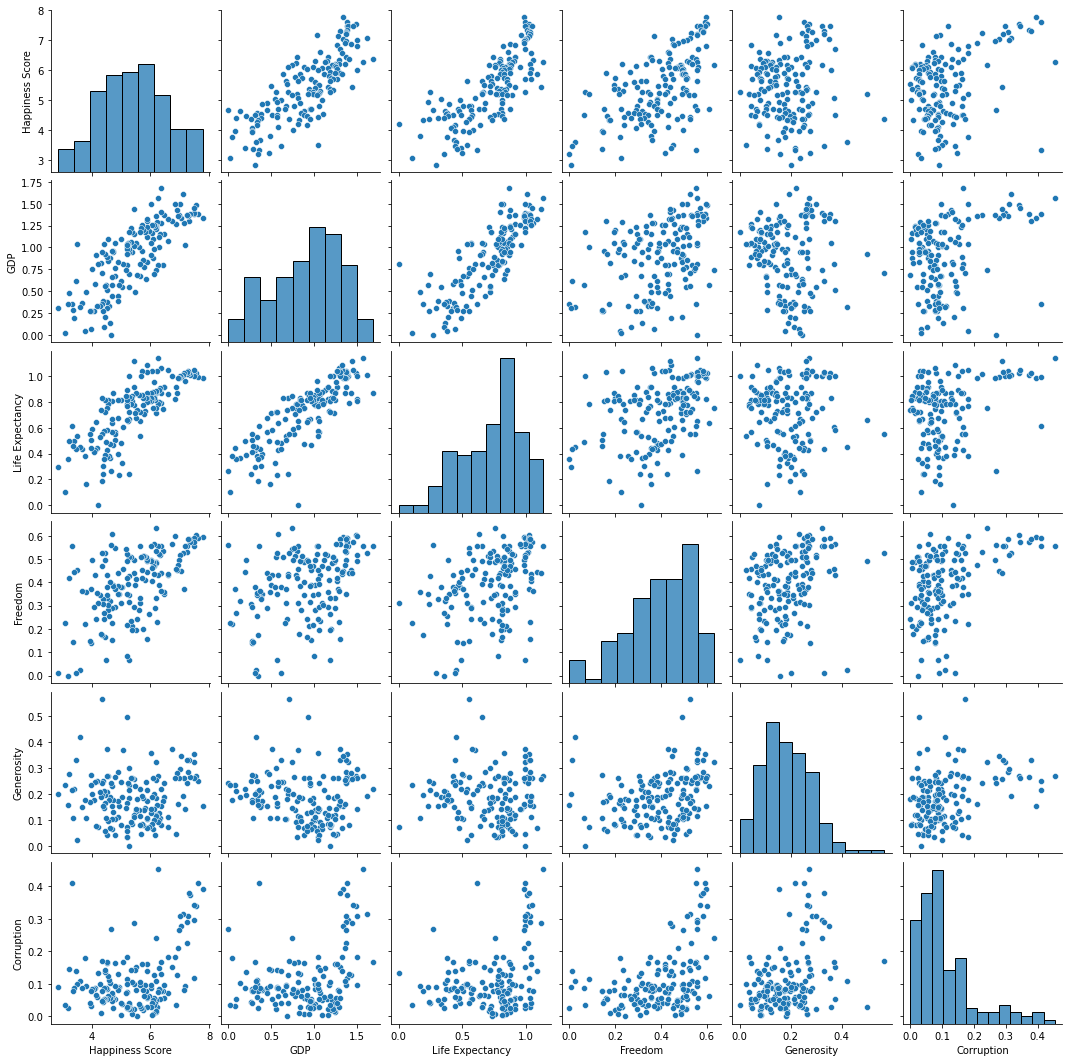

In [16]:
pair = sns.pairplot(sub2)

The scatterplots show good correlations between GDP, Life Expectancy, and Happiness Score as those plots have dots that are closer together in a positive direction. 
The historgrams show that survery results have high freedom rating and low corruption on average. 

## 05. Categorical Plots

<AxesSubplot:xlabel='GDP', ylabel='Count'>

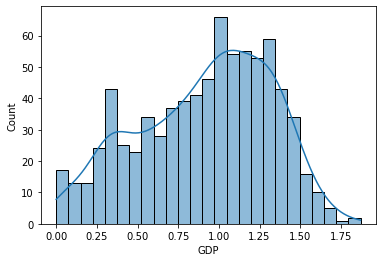

In [17]:
# create histogram to see GDP distribution
sns.histplot(combined_data['GDP'],bins=25,kde=True)

In [18]:
# create categories
combined_data.loc[combined_data['GDP'] <= 0.5, 'GDP_Category'] = 'Low GDP'
combined_data.loc[(combined_data['GDP'] > 0.5) & (combined_data['GDP'] <= 1), 'GDP_Category'] = 'Medium GDP'
combined_data.loc[combined_data['GDP'] > 1, 'GDP_Category'] = 'High GDP'

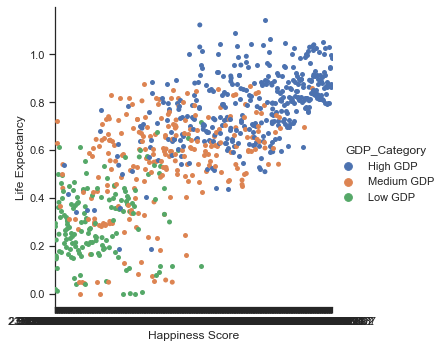

In [19]:
# create categorical plots
sns.set(style='ticks')
catplot = sns.catplot(x='Happiness Score', y='Life Expectancy', hue = 'GDP_Category', data = combined_data)

The categorical plot shows that countries with higher Happiness Score and Life Expectancy tend to have higher GDP. The opposite is also true. There are some instances where Happiness Scoreand Life Expectancy are low despite high GDP. 

## 06. Questions & Answers 

What do distributions of the variables look like?

<font color=red> Happiness Score and GDP are somewhat normally distributed. Life Expectancy and Freedom are right-skewed while generosity and corruption are left-skewed.</font>

What factor(s) is strongly/weakly related to the happiness level? 

<font color=red> GDP and Life Expectancy are the top two factors that have strong positive relantionship with Happiness Score. Generosity has the weakest positive relationship with Happiness Score. </font>

## 07. Hypothesis

If GDP score is over 1, then the average Happiness Score should be 7

If GDP score is over 1, then the average Life Expectancy should be 0.8

## 08. Exporting Data

In [20]:
combined_data.head()

,Country,Happiness Rank,Happiness Score,GDP,Life Expectancy,Freedom,Generosity,Corruption,Year,GDP_Category
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678,0.41978,2015,High GDP
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630,0.14145,2015,High GDP
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139,0.48357,2015,High GDP
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699,0.36503,2015,High GDP
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811,0.32957,2015,High GDP


In [21]:
combined_data.to_pickle(os.path.join(path, 'Edited', 'World_Happiness_Data_New.pkl'))

###